In [1]:
from google.colab import files

uploaded = files.upload()

Saving features.csv to features (2).csv
Saving stores.csv to stores (2).csv
Saving test.csv to test (2).csv
Saving train.csv to train (2).csv


In [0]:
import io
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import pandas_profiling
%matplotlib  inline

# Loading Data

In [0]:
train = pd.read_csv(io.BytesIO(uploaded["train.csv"]))
test = pd.read_csv(io.BytesIO(uploaded["test.csv"]))
store = pd.read_csv(io.BytesIO(uploaded["stores.csv"]))
features = pd.read_csv(io.BytesIO(uploaded["features.csv"]))

# Merging the dataframes

In [0]:
train = pd.merge(pd.merge(train,store),features)
test = pd.merge(pd.merge(test,store),features)

In [29]:
train.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


In [8]:
test.head(5)

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
1,1,2,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
2,1,3,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
3,1,4,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
4,1,5,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573


In [30]:
print(train.info())
print('=' * 50)
print(test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
Type            421570 non-null object
Size            421570 non-null int64
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       150681 non-null float64
MarkDown2       111248 non-null float64
MarkDown3       137091 non-null float64
MarkDown4       134967 non-null float64
MarkDown5       151432 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 115064 entries, 0 to 115063
Data columns (total 15 columns):
Store           115064 non-null int64
Dept            115064 non-null i

# Data Description

## Training Data

In [10]:
# Segregate the nummeric features
num_var_train = [ key for key in dict(train.dtypes) if dict(train.dtypes)[key] in ["int64","float64","int32","float32"]]

# Segregate the categorical features
cat_var_train = [ key for key in dict(train.dtypes) if dict(train.dtypes)[key] in ["object","bool"]]

# Numeric training data
train_num = train[num_var_train]
# Categorical training data
train_cat = train[cat_var_train]

print("Numeric features in training data: ",num_var_train)
print("Categorical features in training data: ",cat_var_train)


Numeric features in training data:  ['Store', 'Dept', 'Weekly_Sales', 'Size', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']
Categorical features in training data:  ['Date', 'IsHoliday', 'Type']


In [0]:
# Creating Numerical Feature Audit Report

# A general function that returns multiple values

def num_record(x):
    return pd.Series([x.count(),x.isnull().sum(),x.sum(),x.mean(),x.median(),x.std(),x.var(),x.min(),x.dropna().quantile(0.01),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75),x.dropna().quantile(0.99),x.max()],
                    index = ["N","N_NAN","SUM","MEAN","MEDIAN","STD","VAR","MIN","Q=1","Q=25","Q50","Q75","Q99","MAX"])

# Creating numerical data summary
num_summary = train_num.apply(lambda x : num_record(x)).T

# Writing summary to an excel sheet
writer=pd.ExcelWriter('Num_Var_Train_Summary.xlsx', engine='xlsxwriter')
num_summary.to_excel(writer,"Sheet 1",index = "True")
num_summary

In [12]:
# Creating Categorical Feature Audit Report

# A general function that returns multiple values
def cat_record(x):
    return pd.Series([x.count(),x.isnull().sum(),x.value_counts()],index = ["N","N_NAN","COL | Values"])

# Creating categorical data summary
cat_summary = train_cat.apply(lambda x: cat_record(x)).T

cat_summary

,N,N_NAN,COL | Values
Date,421570,0,2011-12-23 3027 2011-11-25 3021 2011-12-...
IsHoliday,421570,0,False 391909 True 29661 Name: IsHolida...
Type,421570,0,A 215478 B 163495 C 42597 Name: Type...


## Testing Data

In [13]:
# Segregate the nummeric features
num_var_test = [ key for key in dict(test.dtypes) if dict(test.dtypes)[key] in ["int64","float64","int32","float32"]]

# Segregate the categorical features
cat_var_test = [ key for key in dict(test.dtypes) if dict(test.dtypes)[key] in ["object","bool"]]

# Numeric training data
test_num = test[num_var_test]
# Categorical training data
test_cat = test[cat_var_test]

print("Numeric features in training data: ",num_var_test)
print("Categorical features in training data: ",cat_var_test)


Numeric features in training data:  ['Store', 'Dept', 'Size', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']
Categorical features in training data:  ['Date', 'IsHoliday', 'Type']


In [0]:
# Creating Numerical Feature Audit report

# Creating numerical data summary
num_summary = test_num.apply(lambda x : num_record(x)).T
# Writing summary to an excel sheet
writer=pd.ExcelWriter('Num_Var_Test_Summary.xlsx', engine='xlsxwriter')
num_summary.to_excel(writer,"Sheet1",index = "True")
num_summary

,N,N_NAN,SUM,MEAN,MEDIAN,STD,VAR,MIN,Q=1,Q=25,Q50,Q75,Q99,MAX
Store,115064.0,0.0,2.558817e+06,22.238207,22.000000,12.809930,1.640943e+02,1.000000,1.000000,11.000000,22.000000,33.000000,45.000000,45.000000
Dept,115064.0,0.0,5.101883e+06,44.339524,37.000000,30.656410,9.398155e+02,1.000000,1.000000,18.000000,37.000000,74.000000,98.000000,99.000000
Size,115064.0,0.0,1.570597e+10,136497.688921,140167.000000,61106.926438,3.734056e+09,34875.000000,34875.000000,93638.000000,140167.000000,202505.000000,219622.000000,219622.000000
Temperature,115064.0,0.0,6.206760e+06,53.941804,54.470000,18.724153,3.505939e+02,-7.290000,11.440000,39.820000,54.470000,67.350000,92.140000,101.950000
Fuel_Price,115064.0,0.0,4.121070e+05,3.581546,3.606000,0.239442,5.733244e-02,2.872000,2.957000,3.431000,3.606000,3.766000,4.079000,4.125000
MarkDown1,114915.0,149.0,8.836063e+08,7689.216439,4842.290000,10698.760716,1.144635e+08,-2781.450000,20.840000,1966.460000,4842.290000,9439.140000,65757.570000,103184.980000
MarkDown2,86437.0,28627.0,3.227602e+08,3734.051729,742.590000,8323.495014,6.928057e+07,-35.740000,0.020000,180.350000,742.590000,2735.670000,42920.210000,71074.170000
MarkDown3,105235.0,9829.0,2.528890e+08,2403.088666,78.260000,13767.939313,1.895562e+08,-179.260000,0.150000,15.100000,78.260000,272.580000,86476.660000,149483.310000
MarkDown4,102176.0,12888.0,3.429250e+08,3356.219071,840.940000,7570.501545,5.731249e+07,0.220000,2.610000,155.460000,840.940000,3096.920000,44739.280000,65344.640000
MarkDown5,115064.0,0.0,4.513594e+08,3922.681189,2390.430000,19445.150745,3.781139e+08,-185.170000,269.300000,1309.300000,2390.430000,4227.270000,18599.300000,771448.100000


In [14]:
# Creating Categorical Feature Audit Report

# Creating categorical data summary
cat_summary=test_cat.apply(lambda x: cat_record(x)).T
cat_summary

,N,N_NAN,COL | Values
Date,115064,0,2012-12-21 3002 2012-12-07 2989 2012-12-...
IsHoliday,115064,0,False 106136 True 8928 Name: IsHolida...
Type,115064,0,"A 58713 B 44500 C 11851 Name: Type, d..."


In [15]:
pandas_profiling.ProfileReport(train)

Number of variables,16
Number of observations,421570
Total Missing (%),21.1%
Total size in memory,51.9 MiB
Average record size in memory,129.0 B
Numeric,13
Categorical,2
Boolean,1
Date,0
Text (Unique),0
Rejected,0


In [16]:
pandas_profiling.ProfileReport(test)

Number of variables,15
Number of observations,115064
Total Missing (%),7.4%
Total size in memory,13.3 MiB
Average record size in memory,121.0 B
Numeric,12
Categorical,2
Boolean,1
Date,0
Text (Unique),0
Rejected,0


## Correlation

In [0]:
# Correlation in training data 
train_corr=pd.DataFrame(train.corr())
writer = pd.ExcelWriter("Training_Correlation.xlsx",engine = "xlsxwriter")
train_corr.to_excel(writer,'Sheet1',index=True)
train_corr

,Store,Dept,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
Store,1.000000,0.024004,-0.085195,-0.000548,-0.182881,-0.050097,0.065290,-0.119588,-0.035173,-0.031556,-0.009941,-0.026634,-0.211088,0.208552
Dept,0.024004,1.000000,0.148032,0.000916,-0.002966,0.004437,0.003572,-0.002426,0.000290,0.001784,0.004257,0.000109,-0.007477,0.007837
Weekly_Sales,-0.085195,0.148032,1.000000,0.012774,0.243828,-0.002312,-0.000120,0.085251,0.024130,0.060385,0.045414,0.090362,-0.020921,-0.025864
IsHoliday,-0.000548,0.000916,0.012774,1.000000,0.000593,-0.155949,-0.078281,-0.035586,0.334818,0.427960,-0.000562,-0.053719,-0.001944,0.010460
Size,-0.182881,-0.002966,0.243828,0.000593,1.000000,-0.058313,0.003361,0.345673,0.108827,0.048913,0.168196,0.304575,-0.003314,-0.068238
Temperature,-0.050097,0.004437,-0.002312,-0.155949,-0.058313,1.000000,0.143859,-0.040594,-0.323927,-0.096880,-0.063947,-0.017544,0.182112,0.096730
Fuel_Price,0.065290,0.003572,-0.000120,-0.078281,0.003361,0.143859,1.000000,0.061371,-0.220895,-0.102092,-0.044986,-0.128065,-0.164210,-0.033853
MarkDown1,-0.119588,-0.002426,0.085251,-0.035586,0.345673,-0.040594,0.061371,1.000000,0.024486,-0.108115,0.819238,0.160257,-0.055558,0.050285
MarkDown2,-0.035173,0.000290,0.024130,0.334818,0.108827,-0.323927,-0.220895,0.024486,1.000000,-0.050108,-0.007768,-0.007440,-0.039534,0.020940
MarkDown3,-0.031556,0.001784,0.060385,0.427960,0.048913,-0.096880,-0.102092,-0.108115,-0.050108,1.000000,-0.071095,-0.026467,-0.023590,0.012818


In [0]:
# Correlation in test data

test_corr = pd.DataFrame(test.corr())
writer = pd.ExcelWriter("Test_Correlation.xlsx",engine = "xlsxwriter")
test_corr.to_excel(writer,"Sheet 1",index = "true")
test_corr

,Store,Dept,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
Store,1.000000,0.019627,-0.001166,-0.186845,-0.043495,0.153425,-0.091707,-0.041370,-0.025177,0.010331,0.010419,-0.214872,0.250321
Dept,0.019627,1.000000,0.001249,0.001502,0.003970,0.000554,-0.002353,0.001292,0.000247,0.002510,0.000776,-0.006336,0.004087
IsHoliday,-0.001166,0.001249,1.000000,-0.000443,-0.187428,-0.126443,0.355257,0.265402,0.496062,0.289700,-0.019386,-0.001475,0.010288
Size,-0.186845,0.001502,-0.000443,1.000000,-0.061256,0.055088,0.309614,0.157526,0.050088,0.155448,0.103681,-0.002916,-0.001988
Temperature,-0.043495,0.003970,-0.187428,-0.061256,1.000000,0.073938,-0.168899,-0.324280,-0.049771,-0.059583,0.003937,0.280861,0.022136
Fuel_Price,0.153425,0.000554,-0.126443,0.055088,0.073938,1.000000,0.083320,-0.161963,-0.005827,0.034199,0.012722,-0.465721,0.417126
MarkDown1,-0.091707,-0.002353,0.355257,0.309614,-0.168899,0.083320,1.000000,0.001777,-0.090085,0.804449,0.061714,-0.028729,0.019241
MarkDown2,-0.041370,0.001292,0.265402,0.157526,-0.324280,-0.161963,0.001777,1.000000,-0.063757,-0.101784,-0.014159,-0.059350,-0.000547
MarkDown3,-0.025177,0.000247,0.496062,0.050088,-0.049771,-0.005827,-0.090085,-0.063757,1.000000,-0.059576,-0.015305,-0.022021,0.006298
MarkDown4,0.010331,0.002510,0.289700,0.155448,-0.059583,0.034199,0.804449,-0.101784,-0.059576,1.000000,0.024163,-0.056629,0.021993


## Visualization

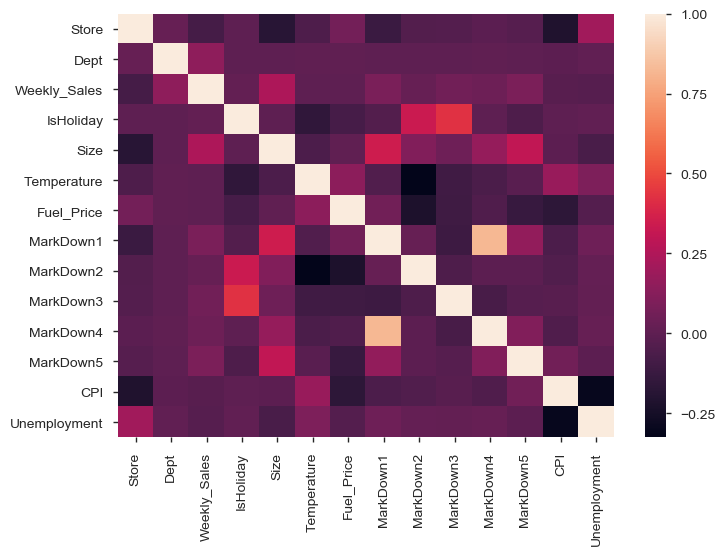

In [0]:
sns.heatmap(train.corr())

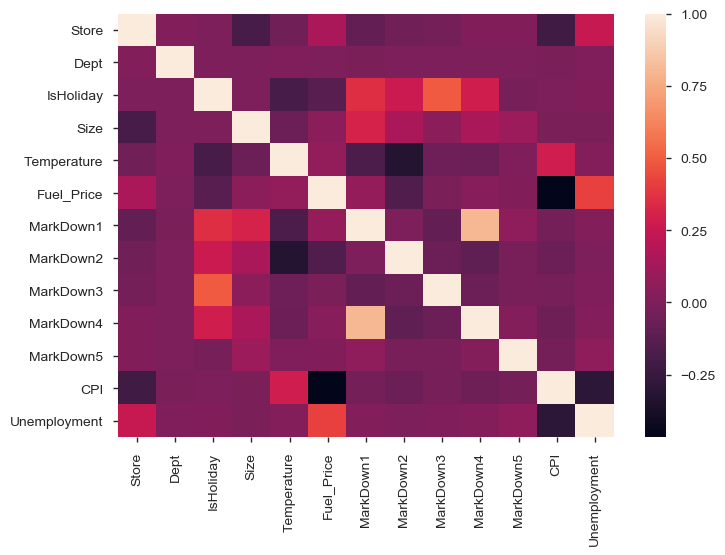

In [0]:
sns.heatmap(test.corr())

# Exploratory Data Analysis

## Store Records Distribution

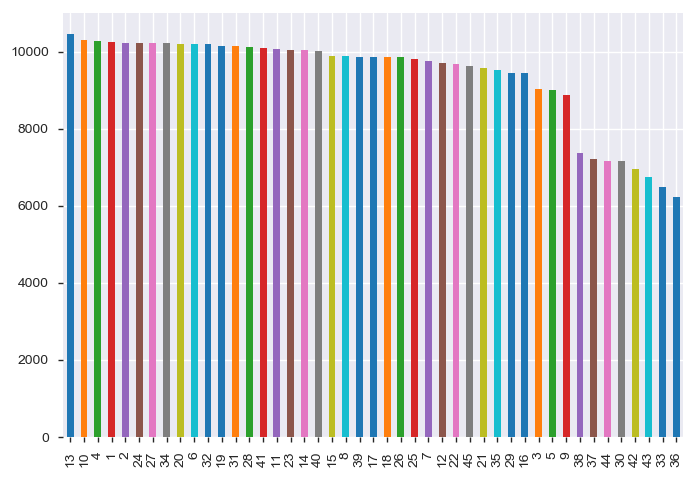

In [0]:
train['Store'].value_counts().plot(kind = 'bar',fig=(4,5))

## Weekly_Sales Distribution

C:\Users\Ankit Singh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


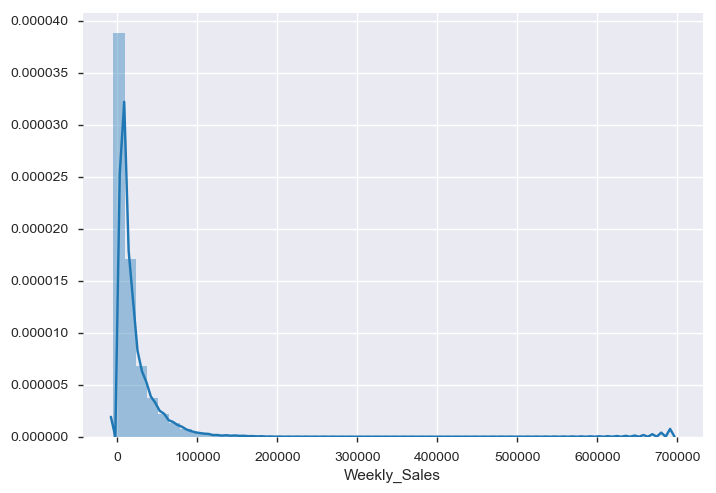

In [0]:
sns.distplot(train.Weekly_Sales)

## Store Size vs Sales

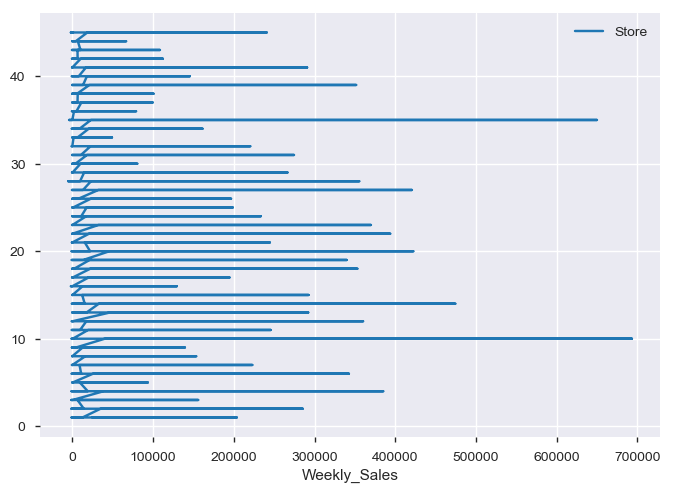

In [0]:
train.plot(kind = 'line',x= 'Weekly_Sales',y = 'Store')

## Sales vs Type

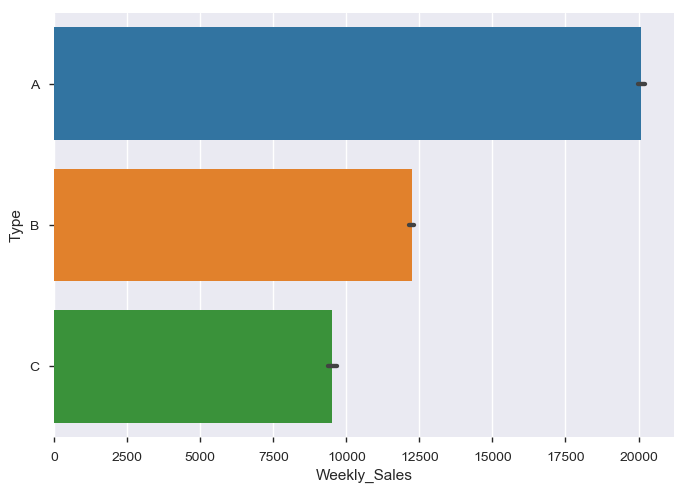

In [0]:
sns.barplot(x = train['Weekly_Sales'], y = train['Type'])

## Sales vs Department

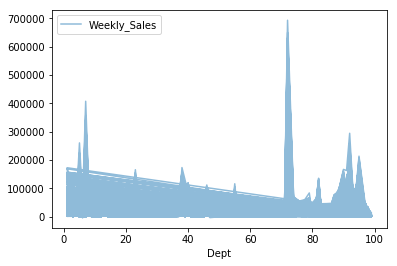

In [0]:
train.plot(kind = 'line',x = 'Dept', y = 'Weekly_Sales',alpha = 1.5,fig = (4,5))

# Preprocessing

## Missing Value Treatment

In [5]:
print(train.isnull().sum())
print('=' *50)
print(test.isnull().sum())

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
dtype: int64
Store               0
Dept                0
Date                0
IsHoliday           0
Type                0
Size                0
Temperature         0
Fuel_Price          0
MarkDown1         149
MarkDown2       28627
MarkDown3        9829
MarkDown4       12888
MarkDown5           0
CPI             38162
Unemployment    38162
dtype: int64


In [0]:
test['CPI'] = test.groupby(['Dept'])['CPI'].transform(lambda x : x.fillna(x.mean()))
test['Unemployment'] = test.groupby(['Dept'])['Unemployment'].transform(lambda x : x.fillna(x.mean()))

In [0]:
# Now only Markdown features have missing values and they can be set to 0 safely so as to assume no 
# no markdown

train = train.fillna(0)
test = test.fillna(0)

In [33]:
print(train.isnull().sum())
print('=' * 50)
print(test.isnull().sum())


Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64
Store           0
Dept            0
Date            0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64


## Outlier Treatment

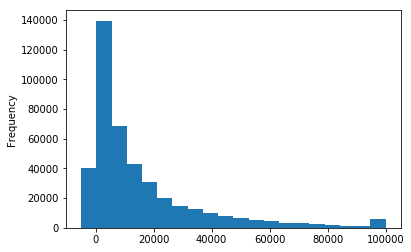

In [34]:
train.Weekly_Sales = np.where(train.Weekly_Sales > 100000,100000,train.Weekly_Sales)
train.Weekly_Sales.plot.hist(bins = 20)

# Feature Engineering

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
Type            421570 non-null object
Size            421570 non-null int64
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       421570 non-null float64
MarkDown2       421570 non-null float64
MarkDown3       421570 non-null float64
MarkDown4       421570 non-null float64
MarkDown5       421570 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 48.6+ MB


In [0]:
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

In [0]:
# Extract features from date
train['Date_dayofweek'] = train['Date'].dt.dayofweek
train['Date_month'] = train['Date'].dt.month
train['Date_year'] = train['Date'].dt.year
train['Date_day'] = train['Date'].dt.day

test['Date_dayofweek'] = test['Date'].dt.dayofweek
test['Date_month'] = test['Date'].dt.month
test['Date_year'] = test['Date'].dt.year
test['Date_day'] = test['Date'].dt.day

## Encoding Categorical Features

In [24]:
print(train['Type'].value_counts())
print('=' * 50)
print(test['Type'].value_counts())

A    215478
B    163495
C     42597
Name: Type, dtype: int64
A    58713
B    44500
C    11851
Name: Type, dtype: int64


In [0]:
train_test_data = [train, test]

In [0]:
type_mapping = { 'A': 0, 'B' : 1, 'C' : 2}
for dataset in train_test_data:
    dataset['Type'] = dataset['Type'].map(type_mapping)

In [39]:
print(train['IsHoliday'].value_counts())
print('=' * 50)
print(test['IsHoliday'].value_counts())

False    391909
True      29661
Name: IsHoliday, dtype: int64
False    106136
True       8928
Name: IsHoliday, dtype: int64


In [0]:
type_mapping = { False : 0 , True : 1}
for dataset in train_test_data:
    dataset['IsHoliday'] = dataset['IsHoliday'].map(type_mapping)

## Constructing new holiday feature based on given data

In [0]:
from datetime import datetime
train['Super_Bowl'] = np.where((train['Date']==datetime(2010,2,12)) | (train['Date']==datetime(2011,2,12)) | (train['Date']==datetime(2012,2,12)) | (train['Date']==datetime(2013,2,12)),1,0)
train['Labour_Day'] = np.where((train['Date']==datetime(2010,9,10)) | (train['Date']==datetime(2011,9,9)) | (train['Date']==datetime(2012,9,7)) | (train['Date']==datetime(2010,9,6)),1,0)
train['Thanksgiving'] = np.where((train['Date']==datetime(2010, 11, 26)) | (train['Date']==datetime(2011, 11, 25)) | (train['Date']==datetime(2012, 11, 23)) | (train['Date']==datetime(2013, 11, 29)),1,0)
train['Christmas'] = np.where((train['Date']==datetime(2010, 12, 31)) | (train['Date']==datetime(2011, 12, 30)) | (train['Date']==datetime(2012, 12, 28)) | (train['Date']==datetime(2013, 12, 27)),1,0)

test['Super_Bowl'] = np.where((test['Date']==datetime(2010, 2, 12)) | (test['Date']==datetime(2011, 2, 11)) | (test['Date']==datetime(2012, 2, 10)) | (test['Date']==datetime(2013, 2, 8)),1,0)
test['Labour_Day'] = np.where((test['Date']==datetime(2010, 9, 10)) | (test['Date']==datetime(2011, 9, 9)) | (test['Date']==datetime(2012, 9, 7)) | (test['Date']==datetime(2013, 9, 6)),1,0)
test['Thanksgiving'] = np.where((test['Date']==datetime(2010, 11, 26)) | (test['Date']==datetime(2011, 11, 25)) | (test['Date']==datetime(2012, 11, 23)) | (test['Date']==datetime(2013, 11, 29)),1,0)
test['Christmas'] = np.where((test['Date']==datetime(2010, 12, 31)) | (test['Date']==datetime(2011, 12, 30)) | (test['Date']==datetime(2012, 12, 28)) | (test['Date']==datetime(2013, 12, 27)),1,0)

In [0]:
train['IsHoliday'] = train['IsHoliday'] | train['Super_Bowl'] | train['Labour_Day'] | train['Christmas'] | train['Thanksgiving']
test['IsHoliday'] = test['IsHoliday'] | test['Super_Bowl'] | test['Christmas'] | test['Labour_Day'] | test['Thanksgiving']

In [18]:
print(train['Super_Bowl'].value_counts())
print(train['Labour_Day'].value_counts())
print(train['Thanksgiving'].value_counts())
print(train['Christmas'].value_counts())

0    418614
1      2956
Name: Super_Bowl, dtype: int64
0    412709
1      8861
Name: Labour_Day, dtype: int64
0    415611
1      5959
Name: Thanksgiving, dtype: int64
0    415624
1      5946
Name: Christmas, dtype: int64


In [19]:
print(test['Super_Bowl'].value_counts())
print(test['Labour_Day'].value_counts())
print(test['Thanksgiving'].value_counts())
print(test['Christmas'].value_counts())

0    112100
1      2964
Name: Super_Bowl, dtype: int64
0    115064
Name: Labour_Day, dtype: int64
0    112088
1      2976
Name: Thanksgiving, dtype: int64
0    112076
1      2988
Name: Christmas, dtype: int64


In [0]:
# Now that hoilday feature is adjusted a/c to extra holidays we delete those redundant features

cols = ['Thanksgiving','Christmas','Super_Bowl','Labour_Day']
train.drop(cols,axis = 1,inplace = True)
test.drop(cols,axis = 1,inplace = True)

## Feature Selection

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
Store             421570 non-null int64
Dept              421570 non-null int64
Weekly_Sales      421570 non-null float64
IsHoliday         421570 non-null int64
Type              421570 non-null int64
Size              421570 non-null int64
Temperature       421570 non-null float64
Fuel_Price        421570 non-null float64
MarkDown1         421570 non-null float64
MarkDown2         421570 non-null float64
MarkDown3         421570 non-null float64
MarkDown4         421570 non-null float64
Date_dayofweek    421570 non-null int64
Date_month        421570 non-null int64
Date_year         421570 non-null int64
Date_day          421570 non-null int64
dtypes: float64(7), int64(9)
memory usage: 54.7 MB


In [0]:
rmv = ['Unemployment','CPI','MarkDown5']
train = train.drop(rmv, axis = 1)
test = test.drop(rmv, axis = 1)

In [36]:
train.head()

,Store,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,Date_dayofweek,Date_month,Date_year,Date_day
0,1,1,24924.50,0,0,151315,42.31,2.572,0.0,0.0,0.0,0.0,4,2,2010,5
1,1,2,50605.27,0,0,151315,42.31,2.572,0.0,0.0,0.0,0.0,4,2,2010,5
2,1,3,13740.12,0,0,151315,42.31,2.572,0.0,0.0,0.0,0.0,4,2,2010,5
3,1,4,39954.04,0,0,151315,42.31,2.572,0.0,0.0,0.0,0.0,4,2,2010,5
4,1,5,32229.38,0,0,151315,42.31,2.572,0.0,0.0,0.0,0.0,4,2,2010,5


In [37]:
test.head()

,Store,Dept,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,Date_dayofweek,Date_month,Date_year,Date_day
0,1,1,0,0,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,4,11,2012,2
1,1,2,0,0,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,4,11,2012,2
2,1,3,0,0,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,4,11,2012,2
3,1,4,0,0,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,4,11,2012,2
4,1,5,0,0,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,4,11,2012,2


# Training and Test Sets

In [0]:
train_x = train.drop(['Weekly_Sales','Date'],axis = 1)
train_y = train['Weekly_Sales']
test_x = test.drop('Date',axis=1).copy()

In [48]:
train_x.shape,train_y.shape,test_x.shape

((421570, 15), (421570,), (115064, 15))

# Modelling and calculating RMSE

In [49]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(train_x,train_y)
y_pred_linear = reg.predict(test_x)

acc_linear = round(reg.score(train_x,train_y) * 100,2)
print(str.format(" Linear Regression model accuracy = {} %",acc_linear))


 Linear Regression model accuracy = 8.86 %


In [50]:
from sklearn.tree import DecisionTreeRegressor

reg2 = DecisionTreeRegressor()
reg2.fit(train_x,train_y)
y_pred_tree = reg2.predict(test_x)

acc_d_tree = round(reg2.score(train_x,train_y) * 100,2)
print(str.format("Decision Tree model accuracy = {} %",acc_d_tree))

Decision Tree model accuracy = 100.0 %


In [51]:
result = reg2.predict(train_x)
for i  in range(5):
  print(result[i])

24924.5
50605.27
13740.12
39954.04
32229.38


In [52]:
from sklearn.ensemble import RandomForestRegressor

reg3 = RandomForestRegressor(n_estimators = 100)
reg3.fit(train_x,train_y)
y_pred_forest = reg3.predict(test_x)
acc_r_forest = round(reg3.score(train_x,train_y) * 100,2)
print(str.format("Random Forest model accuracy = {} %",acc_r_forest))

Random Forest model accuracy = 99.77 %


In [ ]:
submission = pd.DataFrame({
        "Store_Dept_Date": test.Store.astype(str)+'_'+test.Dept.astype(str)+'_'+test.Date.astype(str),
        "Weekly_Sales": y_pred_forest
    })

submission.to_csv('Weekly_Sales_Predicted.csv', index=False)
writer = pd.ExcelWriter("Weekly_Sales_Pred.xlsx",engine="xlsxwriter")
submission.to_excel(writer,'Sheet 1',index=True)

files.download("Weekly_Sales_Predicted.csv")
files.download("Weekly_Sales_Pred.xlsx")